In [80]:
from selenium import webdriver
from time import sleep
import time
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [81]:
# driver　作成
options = webdriver.ChromeOptions()
options.add_argument("--incognito")
driver = webdriver.Chrome(executable_path="./tools/chromedriver.exe",
                          options=options)
driver.implicitly_wait(8)
# drive.get()でサイトにアクセスする
driver.get(
    'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=')
sleep(3)
i=0
while i <= 5:
    # スクロール
    driver.execute_script(
        "0,window.scrollBy(0,document.body.scrollHeight)")
    sleep(2)
    driver.execute_script(
        "0,window.scrollBy(0,document.body.scrollHeight)")
    # CSSセレクタ取得
    button = driver.find_element_by_css_selector("p > .DChGS")
    sleep(3)
    # ボタンを押す
    if button:
        button.click()
    else:
        break
    i = i + 1


In [82]:
soup = BeautifulSoup(driver.page_source, "lxml")
table = soup.find("table", class_="h7vnx2-2 hLKazY cmc-table")
rows = table.find_all("tr")
counter = []
data_list = []
data_list_open_price = []
for tr in rows[1:]:  # 最初の行を飛ばしてfor文で回す
    r = []  # 保存先の行
    for td in tr.find_all('td'):  # tdタグを走査する
        r.append(td.text)
    data_list_open_price.append(r[1].replace('$', '').replace(',', ''))
    data_list.append({
        "Date": r[0],
        "Open": r[1].replace('$', '').replace(',', '')
    })
df = pd.DataFrame(data_list)
print(df)


             Date      Open
0    Aug 02, 2022  23308.43
1    Aug 01, 2022  23336.72
2    Jul 31, 2022  23652.07
3    Jul 30, 2022  23796.82
4    Jul 29, 2022  23845.21
..            ...       ...
207  Jan 07, 2022  43153.57
208  Jan 06, 2022  43565.51
209  Jan 05, 2022  45899.36
210  Jan 04, 2022  46458.85
211  Jan 03, 2022  47343.54

[212 rows x 2 columns]


TypeError: 'int' object is not iterable

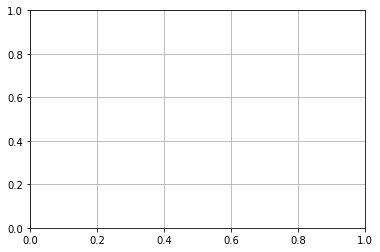

In [87]:
plt.grid()
y = []
x = []
for i in list(map(float, data_list_open_price[::-1])):
    y.append(i)
    #print(i)
for i in len(data_list_open_price):
    x = x+1

plt.grid()


plt.bar(x,y)
plt.show()


